# ***ZIPF'S LAW & LYRICAL ANALYSIS: BILLIE EILISH :***
Team name - **QuantAi**

## 👥 TEAM MEMBERS -
1. **Sarthak Ghoderao** - sarthak.ghoderao@adypu.edu.in
2. **Khyati Kapil** - khyati.kapil@adypu.edu.in
3. **Rudransh Gupta** - rudransh.gupta@adypu.edu.in
4. **Priyabrata Singh** - priyabrata.singh@adypu.edu.in


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BillieEilish.csv to BillieEilish (1).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import re


df = pd.read_csv('BillieEilish.csv')
df.head()

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Billie Eilish,​when the party’s over,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Japa...",2018.0,2018-10-17,don't you know i'm no good for you i've learne...
1,1,Billie Eilish,​everything i wanted,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Targ...",2019.0,2019-11-13,i had a dream i got everything i wanted not wh...
2,2,Billie Eilish,​bad guy,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Japa...",2019.0,2019-03-29,white shirt now red my bloody nose sleepin' yo...
3,3,Billie Eilish,​idontwannabeyouanymore,dont smile at me,2017.0,2017-07-21,don't be that way fall apart twice a day i jus...
4,4,Billie Eilish,​bury a friend,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Japa...",2019.0,2019-01-30,mehki raine billie billie eilish what do you...


## Data Cleaning

In [ ]:
df.info()
df = df.dropna(subset=['Lyric'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  145 non-null    int64  
 1   Artist      145 non-null    object 
 2   Title       145 non-null    object 
 3   Album       82 non-null     object 
 4   Year        119 non-null    float64
 5   Date        119 non-null    object 
 6   Lyric       145 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 8.1+ KB


## Exploratory Data Analysis (EDA)

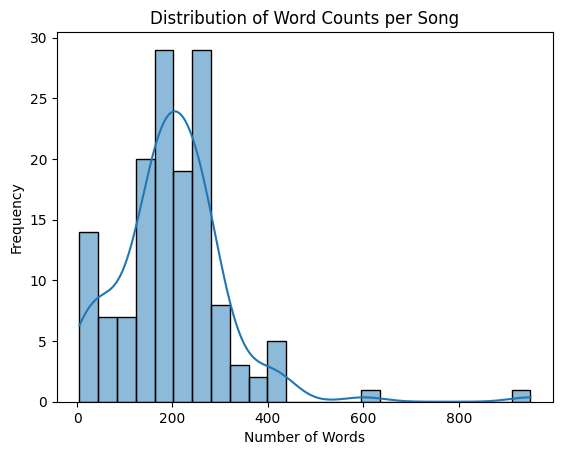

In [ ]:
df['word_count'] = df['Lyric'].apply(lambda x: len(str(x).split()))
sns.histplot(df['word_count'], kde=True)
plt.title('Distribution of Word Counts per Song')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

### Word Count Per Song Distribution

In [ ]:
print("Average words per song:", df['word_count'].mean())
print("Median words per song:", df['word_count'].median())

Average words per song: 199.66206896551725
Median words per song: 193.0


### Most Used Words by Album or Year

In [ ]:
import string
from collections import Counter

def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    words = text.split()
    return words


grouped = df.groupby('Year')['Lyric'].apply(lambda lyrics: ' '.join(lyrics).lower())
for year, lyrics in grouped.items():
    words = clean_text(lyrics)
    top_words = Counter(words).most_common(5)
    print(f"{year}: {top_words}")

2015.0: [('dont', 22), ('it', 21), ('ocean', 16), ('you', 14), ('eyes', 14)]
2016.0: [('ocean', 56), ('eyes', 56), ('you', 47), ('those', 42), ('me', 37)]
2017.0: [('you', 342), ('i', 210), ('my', 205), ('me', 188), ('the', 143)]
2018.0: [('you', 462), ('me', 224), ('i', 214), ('my', 170), ('the', 142)]
2019.0: [('i', 413), ('you', 405), ('me', 225), ('the', 200), ('to', 193)]
2020.0: [('i', 82), ('you', 42), ('to', 41), ('me', 26), ('my', 25)]
2022.0: [('guy', 16), ('im', 14), ('bad', 13), ('your', 9), ('you', 8)]


### Lyrics Length by Album

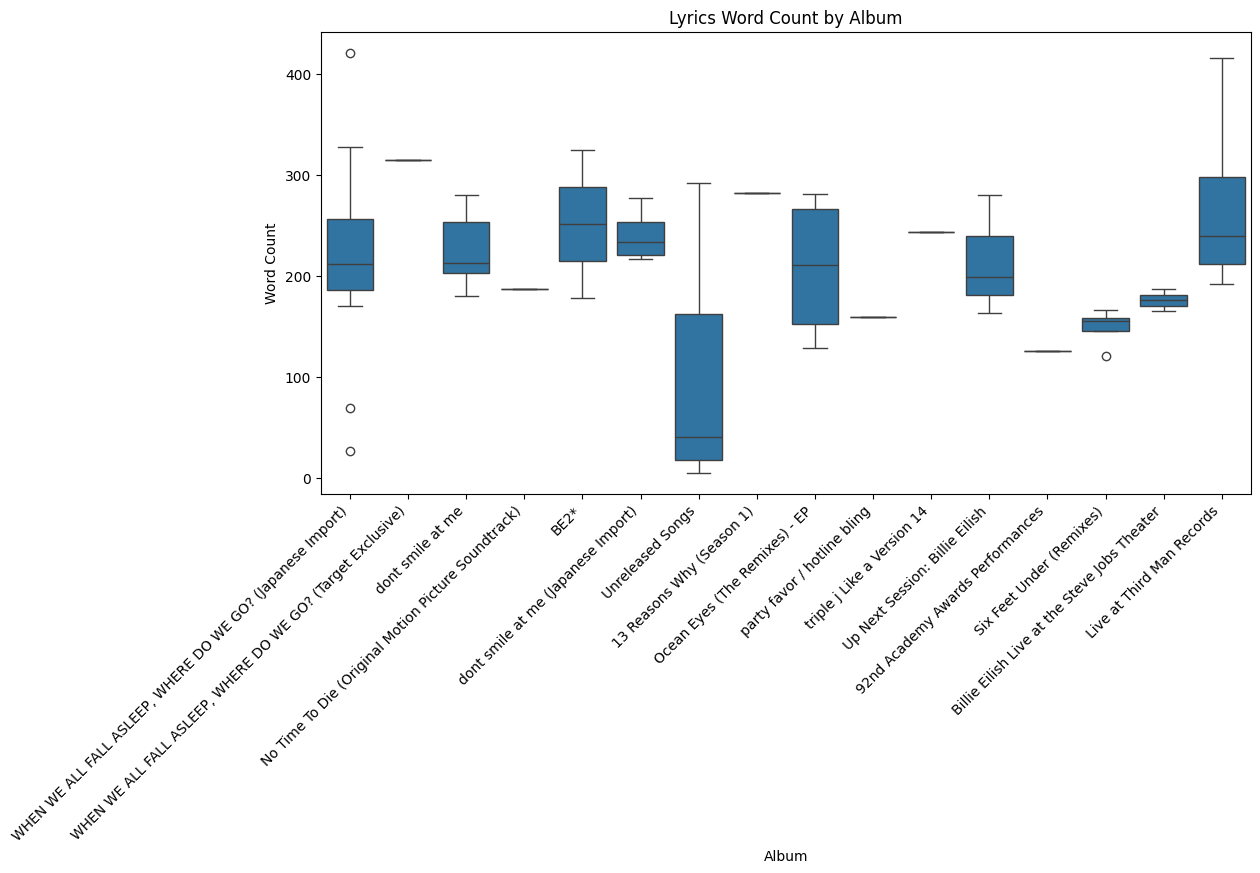

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Album', y='word_count', data=df)
plt.xticks(rotation=45, ha='right')
plt.title("Lyrics Word Count by Album")
plt.xlabel("Album")
plt.ylabel("Word Count")
plt.show()


# Top 10 Albums with the Most Songs

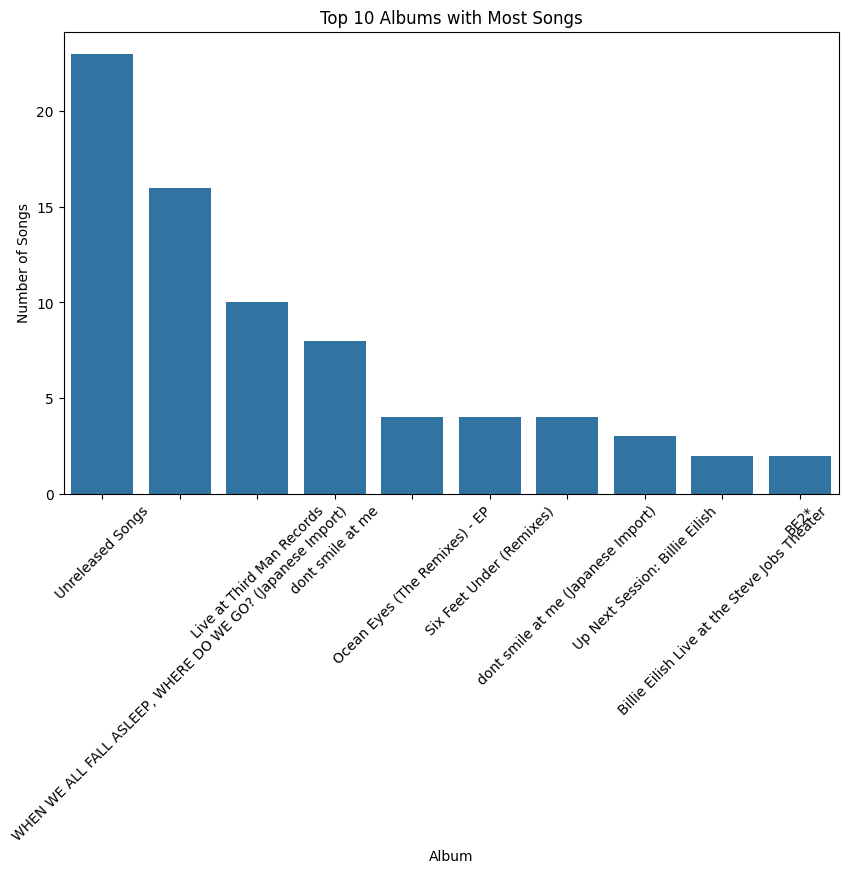

In [ ]:
album_counts = df['Album'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=album_counts.index, y=album_counts.values)
plt.xticks(rotation=45)
plt.title("Top 10 Albums with Most Songs")
plt.xlabel("Album")
plt.ylabel("Number of Songs")
plt.show()

# Most Common Words

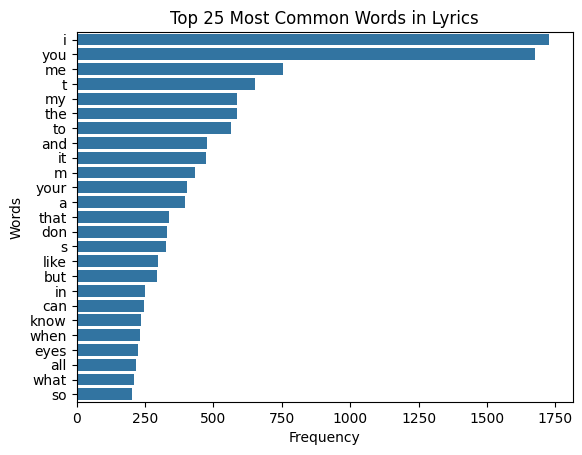

In [ ]:
all_words = ' '.join(df['Lyric'].dropna()).lower()
all_words = re.findall(r'\b\w+\b', all_words)
word_freq = Counter(all_words)

common_words = word_freq.most_common(25)
words, counts = zip(*common_words)
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 25 Most Common Words in Lyrics')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


# Most used words year wise

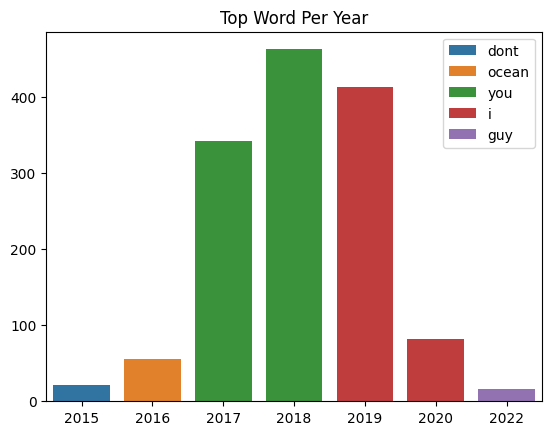

In [ ]:
from collections import Counter
import re

data = df.groupby('Year')['Lyric'].apply(lambda x: ' '.join(x).lower().replace("’", "").replace("'", ""))
top = [(int(y), *Counter(re.findall(r'\b\w+\b', lyrics)).most_common(1)[0]) for y, lyrics in data.items()]
years, words, counts = zip(*top)

sns.barplot(x=years, y=counts, hue=words)
plt.title("Top Word Per Year")
plt.show()

## Zipf's Law Check

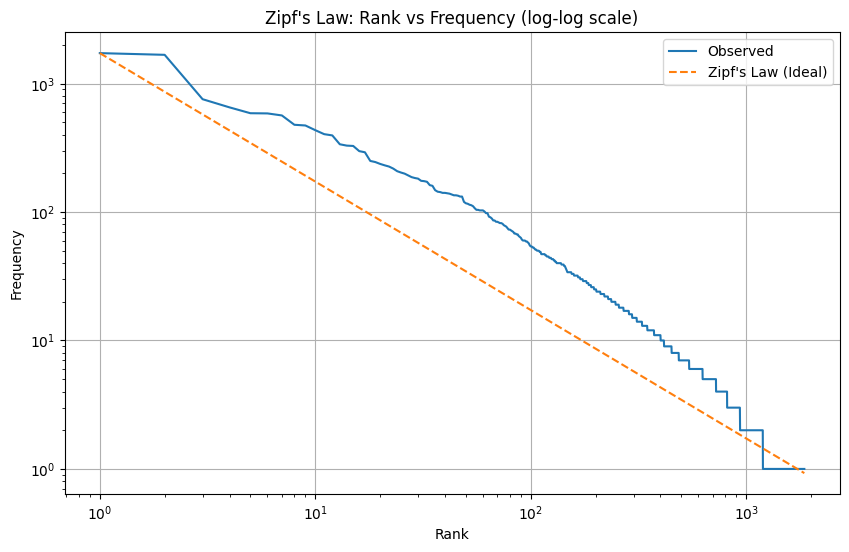

In [ ]:
common_words = word_freq.most_common()
words, frequencies = zip(*common_words)
ranks = np.arange(1, len(frequencies) + 1)
plt.figure(figsize=(10,6))
plt.loglog(ranks, frequencies, label='Observed')
plt.loglog(ranks, frequencies[0]/ranks, label="Zipf's Law (Ideal)", linestyle='--')
plt.title("Zipf's Law: Rank vs Frequency (log-log scale)")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Insights and Interpretation
- Lyrics follow Zipf’s Law, showing natural language distribution.

- Application of Zipf’s Law shows that lyrics generally follow the expected frequency distribution , confirming the typical linguistic behavior where a small number of words are used extremely frequently, and the rest occur less often.

- Top 3 Most repeated words are - I , You, Me , It shows Billie Eilish's style is more of personal Tone

- Most frequent words are emotional and repetitive.

- Song lengths typically range between 100–300 words.





👥 TEAM MEMBERS & INDIVIDUAL CONTRIBUTIONS:

1. **Rudransh Gupta** - Data Preprocessing & Cleaning:
   - Removed stopwords
   - Normalized text
   - Tokenized lyrics

2. **Khyati Kapil** - Zipf's Law Implementation & Visualization:
   - Calculated word ranks and frequencies
   - Plotted Box and Bar plots
   - Created log-log plots and interpreted Zipf’s Law results

3. **Sarthak Ghoderao** - Exploratory Data Analysis:
   - Word count anomalies
   - Unique vocabulary analysis

4. **Priyabatra Singh** - Comparative Analysis & Narrative Building:
   - Compared AI vs human responses
   - Contributed in final insights and interpretations

Each member contributed equally and collaborated to ensure the storytelling was data-driven and insightful.